IMPORTANDO AS BIBLIOTECAS

In [46]:
import pandas as pd
import numpy as np

UPLOAD DO ARQUIVO PARA O DRIVE VIRTUAL DO GOOGLE COLAB

In [47]:
#CARREGANDO ARQUIVO XLSX
xlsx = pd.ExcelFile('/content/Bases_Final_ADS_Jun2021.xlsx')

In [48]:
#transformando Aba Dicionário em dataframe
df1 = pd.read_excel(xlsx, sheet_name='dicionário')

In [49]:
#CONHECENDO O dataframe df1
df1.head()

,coluna,descrição
0,data_tidy,data dd-MM-AAA
1,com_co,Consumo de energia (Gwh) - Comércio - Região C...
2,com_n,Consumo de energia (Gwh) - Comércio - Região N...
3,com_ne,Consumo de energia (Gwh) - Comércio - Região N...
4,com_s,Consumo de energia (Gwh) - Comércio - Região S...


In [50]:
#identificando o tipo de dados do df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   coluna     45 non-null     object
 1   descrição  45 non-null     object
dtypes: object(2)
memory usage: 848.0+ bytes


In [51]:
#transformando a aba 'dados' em dataframe
df2 = pd.read_excel(xlsx, sheet_name='dados')

In [52]:
#CONHECENDO O dataframe df2
df2.head()

,data_tidy,com_co,com_n,com_ne,com_s,com_se,ind_co,ind_n,ind_ne,ind_s,ind_se,res_co,res_n,res_ne,res_s,res_se,renda_r,pop_ocup_br,massa_r,du,pmc_a_co,temp_max_co,temp_min_co,pmc_r_co,pim_co,pmc_a_n,temp_max_n,temp_min_n,pmc_r_n,pim_n,pmc_a_ne,temp_max_ne,temp_min_ne,pmc_r_ne,pim_ne,pmc_a_s,temp_max_s,temp_min_s,pmc_r_s,pim_s,pmc_a_se,temp_max_se,temp_min_se,pmc_r_se,pim_se
0,2004-01-01,307.28207,193.80956,589.29026,704.00174,2450.45329,364.326990,840.29035,2015.78331,1810.98019,6977.47082,506.54049,348.58478,1098.66359,1132.50601,3694.38561,NaN,75777.696766,NaN,21,41.454,31.344701,22.248656,45.711,59.0,32.407,31.983871,23.353226,39.582,65.252,36.613,30.408065,23.430242,38.820,87.8,49.488,28.320430,19.165591,54.848,78.497,50.755550,27.618279,20.365591,47.369,75.454326
1,2004-02-01,290.14685,175.49530,550.77261,733.89486,2396.96520,372.651510,810.25628,1942.01969,1931.86643,7084.62266,472.10253,323.40268,1000.22133,1121.97048,3511.54126,NaN,76464.330910,NaN,18,39.854,30.819461,21.332451,44.365,63.2,30.021,31.277012,23.041954,35.929,62.180,33.932,30.465517,23.208190,36.268,78.9,46.932,28.213793,18.634483,51.696,80.047,48.108250,28.047126,20.089655,45.738,72.953183
2,2004-03-01,307.10015,182.75690,573.02799,738.45706,2402.52074,408.630620,880.88796,2082.25048,2149.03063,7087.61326,493.18088,320.23737,1049.43716,1108.02732,3629.45543,NaN,75925.410718,NaN,23,46.245,31.649770,21.136021,50.427,70.5,33.292,31.575269,23.253226,39.125,76.728,39.008,30.930242,23.439919,40.177,88.1,54.556,27.595699,17.848387,57.356,95.784,54.134850,28.181720,19.749463,49.252,83.942665
3,2004-04-01,329.16091,189.49076,603.93873,743.57047,2580.91388,419.430051,861.61210,2056.94675,2164.76220,7384.53963,506.07092,339.77486,1097.25059,1132.04707,3733.86311,NaN,77102.272116,NaN,20,45.065,30.372381,20.808889,50.649,65.0,33.740,32.407222,23.251667,40.121,75.084,37.197,30.561667,23.271250,39.593,81.5,53.024,26.797778,17.729310,58.216,92.275,52.015075,27.537778,19.650000,49.755,79.495481
4,2004-05-01,303.23791,191.64219,570.17652,696.57947,2344.08400,407.523810,901.70980,2100.19137,2164.98022,7258.30672,492.80831,332.15491,1033.00684,1082.10257,3537.26872,NaN,77353.867496,NaN,21,47.724,25.491060,16.872043,53.663,73.7,37.340,31.824194,22.543548,45.135,75.820,40.033,30.373683,22.742742,42.347,85.2,54.860,20.615054,12.606452,60.436,92.550,54.345225,25.391398,17.573118,51.849,84.187962


In [53]:
#identificando o tipo de dados do df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 45 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   data_tidy    228 non-null    datetime64[ns]
 1   com_co       206 non-null    float64       
 2   com_n        206 non-null    float64       
 3   com_ne       206 non-null    float64       
 4   com_s        206 non-null    float64       
 5   com_se       206 non-null    float64       
 6   ind_co       206 non-null    float64       
 7   ind_n        206 non-null    float64       
 8   ind_ne       206 non-null    float64       
 9   ind_s        206 non-null    float64       
 10  ind_se       206 non-null    float64       
 11  res_co       206 non-null    float64       
 12  res_n        206 non-null    float64       
 13  res_ne       206 non-null    float64       
 14  res_s        206 non-null    float64       
 15  res_se       206 non-null    float64       
 16  renda_r 

In [54]:
#definindo a coluna data_tidy como index
df2.set_index('data_tidy', inplace=True)

In [55]:
#Avaliando dados inserviveis para descarte
df2.isnull().sum()

com_co         22
com_n          22
com_ne         22
com_s          22
com_se         22
ind_co         22
ind_n          22
ind_ne         22
ind_s          22
ind_se         22
res_co         22
res_n          22
res_ne         22
res_s          22
res_se         22
renda_r        98
pop_ocup_br     0
massa_r        98
du              0
pmc_a_co        0
temp_max_co     0
temp_min_co     0
pmc_r_co        0
pim_co          0
pmc_a_n         0
temp_max_n      0
temp_min_n      0
pmc_r_n         0
pim_n           0
pmc_a_ne        0
temp_max_ne     0
temp_min_ne     0
pmc_r_ne        0
pim_ne          0
pmc_a_s         0
temp_max_s      0
temp_min_s      0
pmc_r_s         0
pim_s           0
pmc_a_se        0
temp_max_se     0
temp_min_se     0
pmc_r_se        0
pim_se          0
dtype: int64

In [56]:
#excluindo valores nulos
df2.dropna( inplace=True)

In [57]:
#reavaliando o datframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 2012-03-01 to 2021-02-01
Data columns (total 44 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   com_co       108 non-null    float64
 1   com_n        108 non-null    float64
 2   com_ne       108 non-null    float64
 3   com_s        108 non-null    float64
 4   com_se       108 non-null    float64
 5   ind_co       108 non-null    float64
 6   ind_n        108 non-null    float64
 7   ind_ne       108 non-null    float64
 8   ind_s        108 non-null    float64
 9   ind_se       108 non-null    float64
 10  res_co       108 non-null    float64
 11  res_n        108 non-null    float64
 12  res_ne       108 non-null    float64
 13  res_s        108 non-null    float64
 14  res_se       108 non-null    float64
 15  renda_r      108 non-null    float64
 16  pop_ocup_br  108 non-null    float64
 17  massa_r      108 non-null    float64
 18  du           108 non-null    in

In [58]:
df2.describe()

,com_co,com_n,com_ne,com_s,com_se,ind_co,ind_n,ind_ne,ind_s,ind_se,res_co,res_n,res_ne,res_s,res_se,renda_r,pop_ocup_br,massa_r,du,pmc_a_co,temp_max_co,temp_min_co,pmc_r_co,pim_co,pmc_a_n,temp_max_n,temp_min_n,pmc_r_n,pim_n,pmc_a_ne,temp_max_ne,temp_min_ne,pmc_r_ne,pim_ne,pmc_a_s,temp_max_s,temp_min_s,pmc_r_s,pim_s,pmc_a_se,temp_max_se,temp_min_se,pmc_r_se,pim_se
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,597.166010,399.725058,1143.349628,1236.787791,3888.409596,771.709755,1199.726478,2018.010795,2683.587565,7706.407342,940.974091,745.348996,2224.313308,1774.747860,5503.908962,1701.707824,90395.879675,133754.285166,20.916667,88.913458,30.844733,19.458549,89.716615,108.231296,95.101758,33.196625,23.615529,95.333276,103.305037,88.213761,30.918242,23.409343,89.425201,98.465741,95.394831,25.181079,16.299033,99.670661,94.810148,95.504689,27.662633,19.252320,96.434672,88.942679
std,43.580808,33.162821,99.642881,127.063716,339.004073,49.917466,84.557665,250.936522,138.739801,481.460656,118.632798,99.434620,234.016280,186.015531,381.814747,169.822748,2502.579897,20965.413752,1.312236,10.765745,2.071797,2.083724,10.486519,21.112077,13.098171,1.179385,0.612764,13.656896,11.381303,11.136504,0.752002,0.877949,11.184005,8.815971,10.923631,3.454026,3.260902,11.608968,9.999418,10.128352,2.180684,2.081692,10.525176,10.701263
min,476.971140,327.528770,910.683050,998.841710,2861.776330,677.273790,938.990240,1452.131560,2213.223330,6331.118910,692.016000,503.494000,1698.329000,1461.139140,4828.556000,1400.511600,81666.000000,101690.064900,18.000000,63.361000,24.298343,14.247312,65.479000,71.280000,66.550000,30.330968,22.054839,69.030000,68.732000,54.407000,29.118407,21.095898,60.183000,60.700000,73.980000,17.711111,8.993333,85.016000,64.969000,66.150575,22.314066,14.887778,76.130000,60.322438
25%,564.319750,375.739000,1084.957250,1139.354250,3672.393945,738.683375,1152.678110,1833.450745,2609.619503,7425.643797,850.716500,677.971500,2081.378250,1633.945000,5201.603050,1568.356175,89512.000000,115231.729775,20.000000,79.883000,29.596172,17.557796,81.850250,89.792500,86.446750,32.406961,23.257079,87.131500,95.546000,81.146583,30.331951,22.621117,82.555000,93.825000,87.560000,22.661335,13.480054,92.049000,88.476750,89.208812,25.831934,17.460833,90.639500,81.562121
50%,601.829720,402.476440,1167.274780,1208.887500,3901.913500,766.697985,1215.581500,1933.481785,2690.891845,7620.152085,932.994135,756.364000,2221.195500,1729.850985,5443.638000,1694.471000,90805.000000,134382.163150,21.000000,87.509000,31.098172,20.502500,87.821500,110.075000,93.415500,32.905989,23.638889,92.247500,102.750000,86.704500,31.008725,23.663934,87.243000,99.250000,95.602000,25.283029,16.489596,96.908000,94.932500,94.450587,27.636430,19.585556,93.577500,89.660952
75%,629.749085,423.494560,1207.878798,1351.579743,4158.268750,801.776763,1265.935250,2260.047000,2783.906375,7960.579000,1008.947127,823.488423,2358.806820,1894.737327,5727.093090,1821.371050,91791.250000,152435.660850,22.000000,97.825000,32.040927,21.036345,96.189750,127.690000,100.814000,34.062008,24.020040,99.125500,110.296000,94.731500,31.423698,24.085159,92.800500,103.750000,100.771000,28.089830,19.130108,103.106000,102.867250,101.477806,29.472885,21.044518,98.393750,94.745178
max,683.111370,460.262000,1390.622270,1552.666000,4571.717000,904.781750,1321.958000,2480.087000,3037.010600,8669.644000,1306.373760,962.100360,2758.984880,2302.787450,6571.311640,2025.040600,94552.000000,170523.712000,23.000000,117.215000,35.423621,22.274119,126.062000,145.300000,146.160034,35.93

In [59]:
#Importando a biblioteca seaborn
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

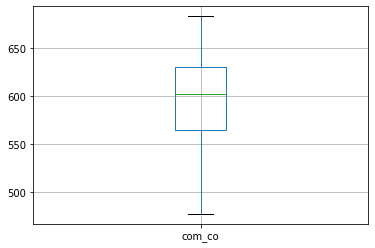

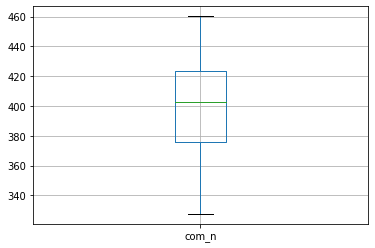

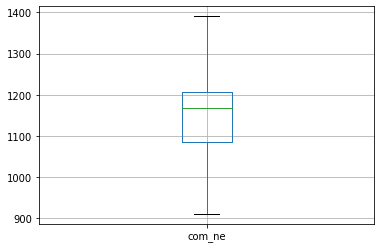

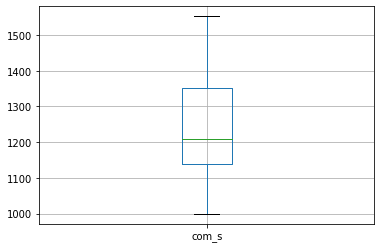

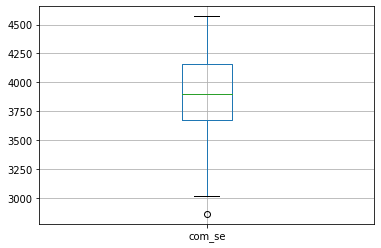

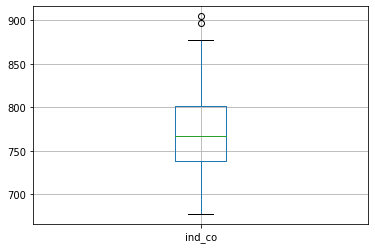

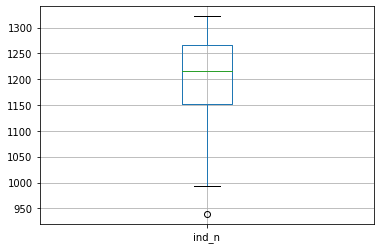

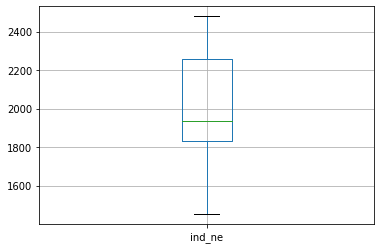

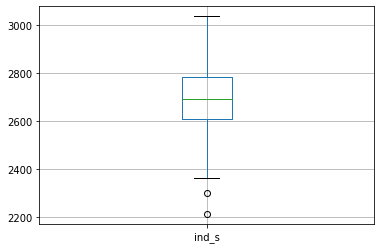

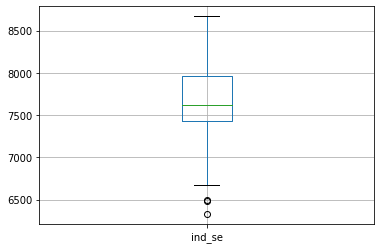

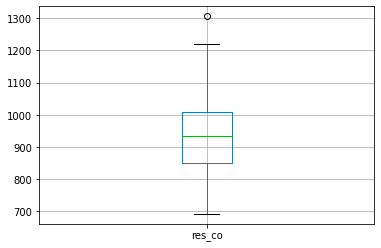

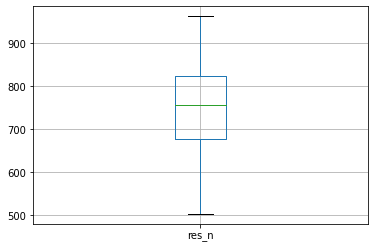

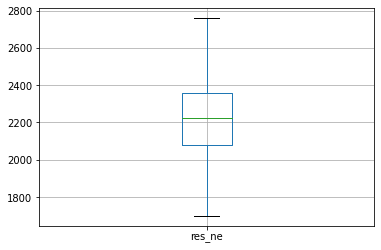

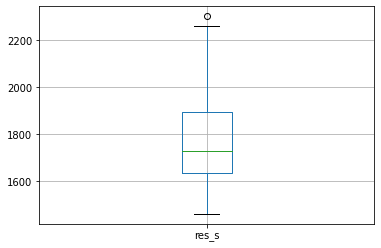

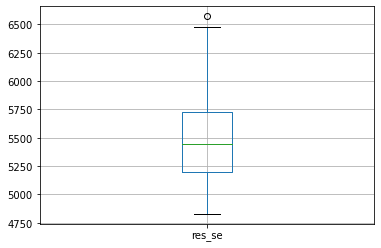

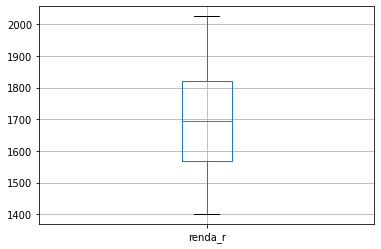

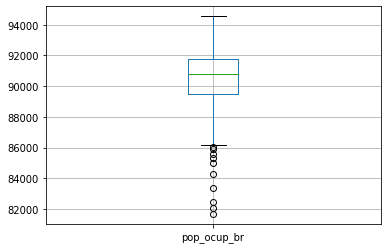

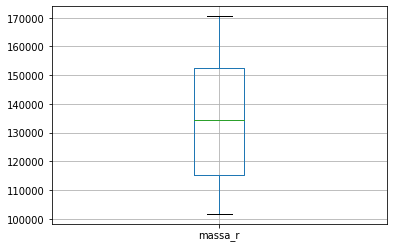

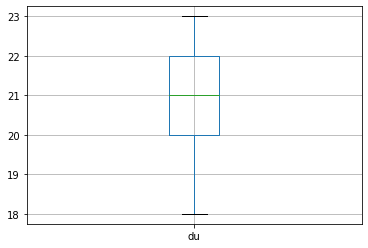

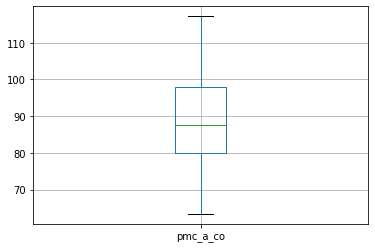

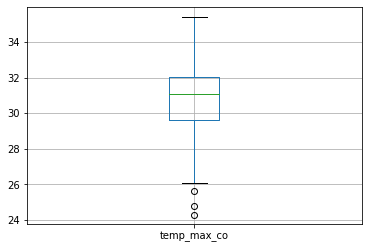

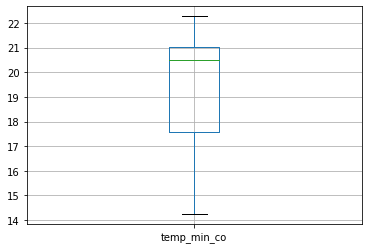

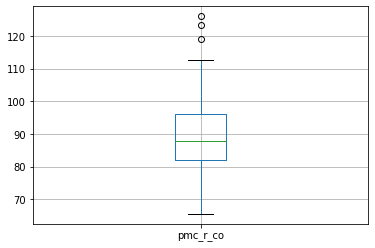

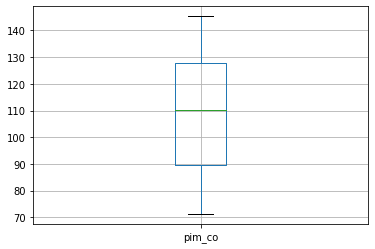

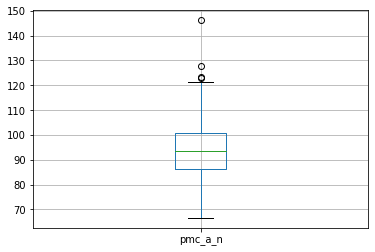

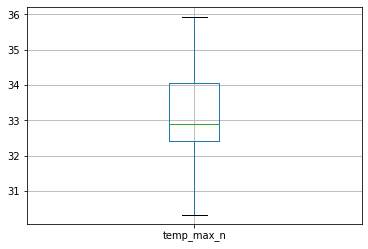

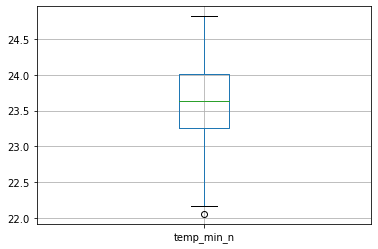

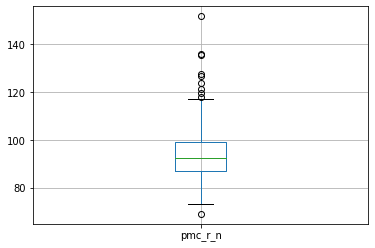

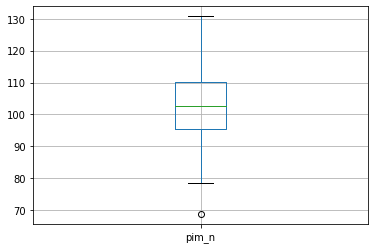

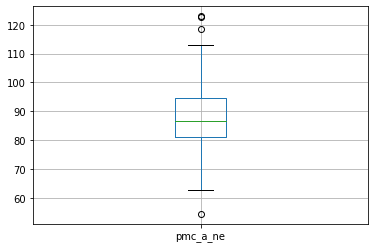

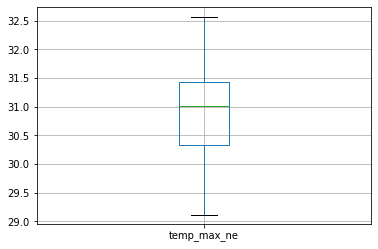

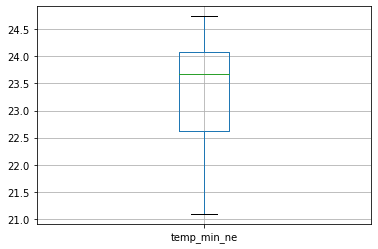

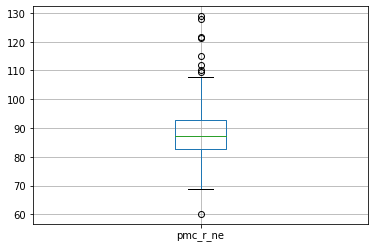

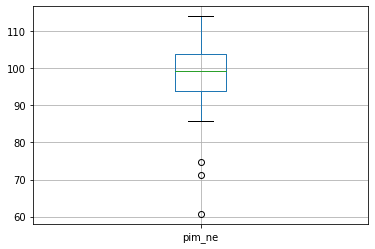

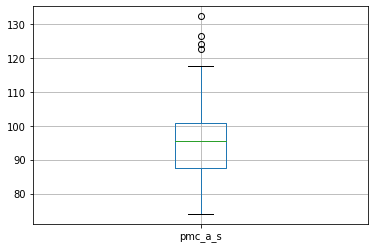

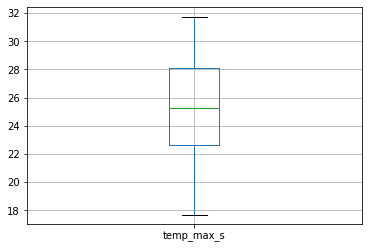

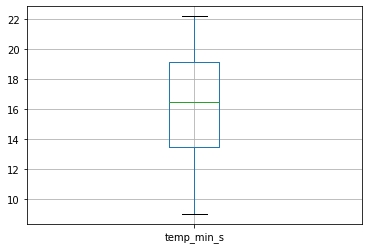

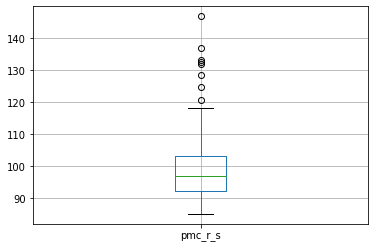

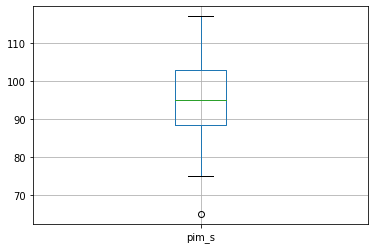

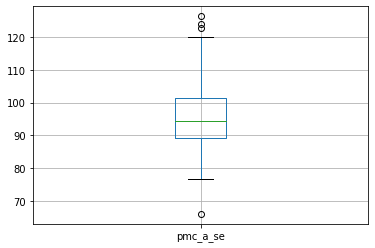

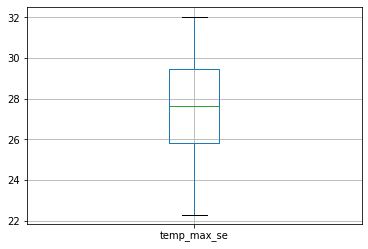

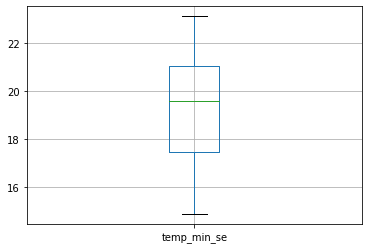

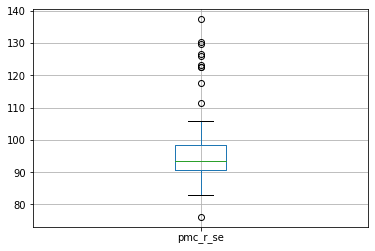

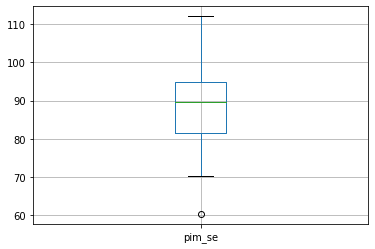

In [60]:
#Verificando outliers para todos os dados
for column in df2:
    plt.figure()
    df2.boxplot([column])

In [61]:
#Removendo outliers em todas as colunas
from scipy import stats
df2[(np.abs(stats.zscore(df2)) < 3).all(axis=1)]

,com_co,com_n,com_ne,com_s,com_se,ind_co,ind_n,ind_ne,ind_s,ind_se,res_co,res_n,res_ne,res_s,res_se,renda_r,pop_ocup_br,massa_r,du,pmc_a_co,temp_max_co,temp_min_co,pmc_r_co,pim_co,pmc_a_n,temp_max_n,temp_min_n,pmc_r_n,pim_n,pmc_a_ne,temp_max_ne,temp_min_ne,pmc_r_ne,pim_ne,pmc_a_s,temp_max_s,temp_min_s,pmc_r_s,pim_s,pmc_a_se,temp_max_se,temp_min_se,pmc_r_se,pim_se
data_tidy,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-03-01,538.035000,337.72106,989.80200,1307.53347,3863.73600,723.79700,1289.05600,2470.22300,2654.94326,8440.73900,750.55200,503.49400,1838.82300,1706.80842,5470.92600,1620.8001,88407.000000,107087.6547,22,94.676000,31.588940,20.275565,92.300000,88.60,90.689000,31.570430,23.123656,87.872000,98.692,90.320000,30.886693,23.627344,87.259000,98.2,93.792000,28.897850,18.037634,93.976000,103.779,101.776675,29.568817,20.512903,93.890000,98.529102
2012-04-01,550.976000,327.52877,971.11600,1194.04153,3812.37800,679.79100,1195.25900,2405.56800,2607.04467,8642.44600,774.28100,532.48600,1779.37500,1533.56447,5308.42900,1648.6055,88863.000000,110016.8110,20,87.288000,30.712567,20.480833,89.052000,94.61,84.486000,32.242778,23.440000,84.882000,92.428,82.856000,31.034941,23.491848,82.745000,87.5,86.004000,25.463333,16.548889,89.712000,96.702,92.596900,28.464444,20.126667,88.959000,91.976011
2012-05-01,527.687000,342.34862,990.93400,1075.80465,3479.75900,733.68800,1223.34100,2455.47300,2480.56698,8371.13300,752.53500,552.16100,1811.92800,1461.13914,4954.25600,1684.0059,89129.000000,111823.9804,22,95.462000,28.057194,17.255645,91.658000,117.88,94.625000,32.471505,22.826344,92.782000,101.020,90.904000,30.789866,23.155256,88.780000,96.1,92.900000,23.529032,14.069892,91.160000,106.886,100.260350,24.735484,17.019355,92.818000,101.194436
2012-06-01,511.065000,345.11619,956.09100,1035.92652,3433.50100,692.63700,1154.50100,2274.53400,2588.74094,8448.41500,739.70400,566.43700,1775.11500,1490.06950,5033.56400,1655.9483,89181.000000,111539.3785,20,98.257000,27.442174,16.920000,90.741000,111.81,95.547000,32.627778,22.576667,89.190000,100.328,94.479000,30.018333,22.491355,88.268000,91.2,97.092000,20.488889,11.867778,90.492000,98.828,101.844175,25.260000,17.468889,90.859000,96.516733
2012-07-01,500.685000,337.28410,911.28200,1022.00159,3262.13000,696.20500,1185.48300,2404.13000,2605.38301,8322.72100,692.01600,551.45000,1698.32900,1503.94607,4828.55600,1725.2680,89428.000000,117174.6232,22,101.012000,27.984021,14.807258,94.126000,118.68,98.205000,32.887097,22.054839,92.138000,90.840,95.669000,29.962660,22.065355,89.480000,93.5,94.356000,20.134408,10.229032,89.428000,105.546,102.538275,25.422580,16.193548,92.470000,105.693328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,653.140430,419.52932,1251.50332,1419.07273,4069.93191,834.70247,1164.99370,1753.49822,2775.75735,7569.11501,1083.96463,810.44539,2598.78601,2043.97021,5906.84306,1927.5270,89241.000000,160923.9435,20,76.784000,31.815776,21.123047,78.410000,85.89,86.581000,32.657419,24.369534,86.151000,92.344,70.274000,31.259277,23.778392,74.514000,86.5,86.792000,31.306452,19.796774,99.860000,87.064,87.690450,28.508844,19.903132,92.775000,75.762939
2020-09-01,598.840250,447.84780,1080.02124,1109.78473,3430.21066,877.29144,1255.32137,1862.04590,2917.99447,7720.47116,1154.38155,942.95816,2461.83006,1928.28419,5753.33196,2025.0406,84301.000000,170523.7120,21,90.811000,28.326113,20.161646,87.705000,133.82,117.067000,35.686667,24.325556,110.302000,130.796,89.458000,30.976445,22.072796,88.410000,102.0,104.416000,21.372639,14.721111,105.480000,103.933,101.401314,25.865203,21.086292,100.113000,93.281236
2020-11-01,626.848590,440.55832,1145.31477,1217.82553,3673.80926,849.41843,1237.75480,1809.09201,3005.06224,7792.22404,1221.32865,929.14619,2680.38864,1950.67953,5994.82932,1991.1885,86179.000000,167004.1137,20,95.388698,29.165503,21.084978,95.482676,94.15,127.70

A covariância é uma medida que indica a inter-dependência entre duas variáveis. A covariância indica como duas variáveis se comportam conjuntamente em relação às suas médias. 
Uma covariância igual a 0 indica independencia entre as duas variáveis ;
Uma covariância alta e positiva indica uma relação direta entre as variávies.
Uma covariancia negativa com valor absoluto alto indica relação inversa entre as variáveis 
  Para calcular a covariância utiliza-se a função cov() que retorna uma matriz indicando a covariância de cada coluna com outra.

In [62]:
df2.cov()

,com_co,com_n,com_ne,com_s,com_se,ind_co,ind_n,ind_ne,ind_s,ind_se,res_co,res_n,res_ne,res_s,res_se,renda_r,pop_ocup_br,massa_r,du,pmc_a_co,temp_max_co,temp_min_co,pmc_r_co,pim_co,pmc_a_n,temp_max_n,temp_min_n,pmc_r_n,pim_n,pmc_a_ne,temp_max_ne,temp_min_ne,pmc_r_ne,pim_ne,pmc_a_s,temp_max_s,temp_min_s,pmc_r_s,pim_s,pmc_a_se,temp_max_se,temp_min_se,pmc_r_se,pim_se
com_co,1899.286845,834.905514,3710.901246,3659.401961,11264.447156,290.164374,-110.687342,-4.188918e+03,1905.159248,-3.996162e+03,3.203494e+03,1.761827e+03,5.339924e+03,3.253120e+03,8.782510e+03,1.469558e+03,5.523666e+04,2.922126e+05,-13.305910,-92.703868,49.291003,60.730500,-23.706875,-267.215225,23.464569,3.613933,16.806751,76.238729,67.041497,-9.922073,15.510389,20.936617,44.923260,87.473972,63.494498,81.538437,79.952113,143.942306,-87.536301,-5.799193,54.031777,42.767870,80.245619,-176.223621
com_n,834.905514,1099.772724,2053.416393,-127.227241,990.599455,927.698204,617.523425,-4.160596e+03,1828.334213,-5.441672e+03,2.279995e+03,2.719205e+03,3.753432e+03,6.849286e+02,7.655008e+02,2.329349e+03,2.623073e+04,3.736043e+05,9.034162,-59.083894,21.923122,8.410733,-7.496814,274.634525,114.227583,24.647665,8.349132,150.019658,207.851751,10.774908,1.930177,-1.631364,50.482414,99.200456,75.534529,-14.533674,-9.920273,124.660977,8.041829,24.130220,-3.634276,-5.412128,97.796905,-42.140096
com_ne,3710.901246,2053.416393,9928.703687,7757.209343,23194.082223,403.874045,368.888229,-1.334640e+04,2512.205682,-2.019272e+04,6.731751e+03,5.119649e+03,1.535684e+04,8.183666e+03,1.821959e+04,5.164911e+03,1.264879e+05,9.276378e+05,-14.471591,-362.099344,74.509172,104.025835,-144.164352,-575.765491,-14.691061,-5.897797,29.787473,153.843236,94.194989,-97.188801,30.596118,45.285363,80.495296,87.748793,88.342907,159.115740,152.802521,379.606470,-347.390696,-83.799228,98.467234,79.226614,203.844256,-573.321201
com_s,3659.401961,-127.227241,7757.209343,16145.187860,38184.146693,-1669.706645,-998.531331,-5.663677e+03,-95.297292,-9.526498e+03,5.033537e+03,-6.492497e+02,1.190291e+04,1.650899e+04,3.648195e+04,4.021600e+02,8.961470e+04,2.474327e+05,-52.062291,-204.877722,70.708682,169.390321,-56.024352,-2060.714084,-97.084458,-81.698883,23.364371,9.693201,-363.777338,-5.016942,42.831434,72.943232,109.881021,-55.376305,91.158101,375.118879,353.290811,338.185545,-537.811299,-55.645036,211.937417,194.702114,126.558501,-747.576243
com_se,11264.447156,990.599455,23194.082223,38184.146693,114923.761637,-5850.524708,407.792006,-2.457012e+03,-1340.304358,-3.088390e+03,8.786418e+03,-2.341877e+03,1.944367e+04,2.586986e+04,7.778326e+04,-1.262864e+04,4.257249e+05,-9.051649e+05,-120.527811,-18.135922,324.225737,478.999489,512.962403,-4707.456184,-327.938469,-149.163499,91.818511,157.062859,-803.166207,560.064535,147.195277,220.972691,872.090846,640.686976,229.609647,936.120066,875.975917,710.799181,-1068.952546,151.196862,599.901523,452.437683,588.743178,-1307.071775
ind_co,290.164374,927.698204,403.874045,-1669.706645,-5850.524708,2491.753400,-135.681328,-3.472289e+03,4267.761395,-2.306054e+03,3.215062e+03,2.839586e+03,5.132797e+03,1.802268e+03,1.623037e+03,4.178065e+03,-1.884873e+04,5.803302e+05,16.978176,18.406949,-11.024120,-12.862935,-23.691629,506.072318,299.500944,25.734419,-0.363513,247.445117,364.579601,6.734956,-13.841185,-18.996009,2.143220,40.782345,201.026047,-68.889964,-52.751145,181.013719,195.504696,91.369793,-45.899495,-19.815567,96.568420,70.780618
ind_n,-110.687342,617.523425,368.888229,-998.531331,407.792006,-135.681328,7149.998661,1.566244e+03,-474.399162,-9.387261e+02,-6.133321e+02,1.465990e+03,-1.103500e+03,-2.310874e+03,-2.486434e+03,-2.505557e+03,-3.022287e+04,-2.961647e+05,28.101365,123.825958,16.921876,8.546665,229.905316,207.776346,135.978886,17.671420,6.484712,216.573376,111.975146,219.353485,-1.022440,-0.620654,247.627678,259.697500,22.340156,-9.060866,-10.516218,38.094127,22.063566,98.189978,-9.681238,-4.348792,184.285383,114.313391
ind_ne,-4188.917851,-4160.595966,-13346.398127,-56

A dificuldade de interpretação da covariância em virtude da diferença de escalas inviabiliza seu uso no dia a dia em dataframes com numeor mto grande de variáveis. 
Para superação desta limitação utilização a técnica da correlação que trabalha com a normalizamos da covariância para uma base que se situa entre 1 e -1.
A lógica de sua interpretação é a mesma. 
Para resultado igual a 0 observam-se variaveis indepentendes, enquanto que para variáveis negativas observa-se uma correlação inversa e mais intensa quanto mais proxima de -1. Igualmente para qualquer valor positivo observa-se uma correlação direta que se mostra mais intensa quanto mais proxima de 1.  Calcula-se a correlação com a função corr().

In [63]:
df2.corr()

,com_co,com_n,com_ne,com_s,com_se,ind_co,ind_n,ind_ne,ind_s,ind_se,res_co,res_n,res_ne,res_s,res_se,renda_r,pop_ocup_br,massa_r,du,pmc_a_co,temp_max_co,temp_min_co,pmc_r_co,pim_co,pmc_a_n,temp_max_n,temp_min_n,pmc_r_n,pim_n,pmc_a_ne,temp_max_ne,temp_min_ne,pmc_r_ne,pim_ne,pmc_a_s,temp_max_s,temp_min_s,pmc_r_s,pim_s,pmc_a_se,temp_max_se,temp_min_se,pmc_r_se,pim_se
com_co,1.000000,0.577684,0.854551,0.660835,0.762447,0.133382,-0.030037,-0.383039,0.315090,-0.190453,0.619618,0.406565,0.523593,0.401287,0.527802,0.198562,0.506459,0.319816,-0.232668,-0.197587,0.545915,0.668762,-0.051874,-0.290426,0.041106,0.070312,0.629354,0.128094,0.135163,-0.020444,0.473269,0.547195,0.092168,0.227674,0.133375,0.541678,0.562596,0.284511,-0.200871,-0.013138,0.568540,0.471418,0.174943,-0.377862
com_n,0.577684,1.000000,0.621411,-0.030193,0.088113,0.560406,0.220216,-0.499966,0.397377,-0.340816,0.579532,0.824618,0.483650,0.111031,0.060456,0.413606,0.316061,0.537350,0.207599,-0.165491,0.319083,0.121714,-0.021557,0.392259,0.262972,0.630186,0.410863,0.331241,0.550694,0.029175,0.077397,-0.056031,0.136110,0.339306,0.208510,-0.126882,-0.091735,0.323806,0.024251,0.071841,-0.050254,-0.078397,0.280185,-0.118743
com_ne,0.854551,0.621411,1.000000,0.612686,0.686635,0.081198,0.043782,-0.533770,0.181722,-0.420909,0.569478,0.516721,0.658581,0.441522,0.478894,0.305225,0.507242,0.444047,-0.110677,-0.337549,0.360924,0.501020,-0.137969,-0.273696,-0.011256,-0.050187,0.487859,0.113052,0.083060,-0.087583,0.408320,0.517657,0.072232,0.099891,0.081163,0.462319,0.470269,0.328166,-0.348656,-0.083034,0.453161,0.381952,0.194367,-0.537671
com_s,0.660835,-0.030193,0.612686,1.000000,0.886455,-0.263249,-0.092937,-0.177629,-0.005406,-0.155722,0.333923,-0.051387,0.400300,0.698473,0.751976,0.018637,0.281819,0.092882,-0.312241,-0.149771,0.268599,0.639774,-0.042046,-0.768184,-0.058333,-0.545179,0.300082,0.005586,-0.251549,-0.003545,0.448252,0.653874,0.077322,-0.049435,0.065676,0.854716,0.852655,0.229266,-0.423286,-0.043238,0.764880,0.736093,0.094633,-0.549793
com_se,0.762447,0.088113,0.686635,0.886455,1.000000,-0.345730,0.014226,-0.028883,-0.028497,-0.018922,0.218475,-0.069474,0.245091,0.410242,0.600936,-0.219359,0.501806,-0.127356,-0.270938,-0.004969,0.461632,0.678094,0.144294,-0.657734,-0.073854,-0.373080,0.442010,0.033925,-0.208165,0.148349,0.577391,0.742445,0.230017,0.214373,0.062004,0.799468,0.792409,0.180613,-0.315340,0.044035,0.811489,0.641117,0.165003,-0.360296
ind_co,0.133382,0.560406,0.081198,-0.263249,-0.345730,1.000000,-0.032145,-0.277204,0.616235,-0.095952,0.542915,0.572091,0.439395,0.194097,0.085158,0.492864,-0.150883,0.554523,0.259195,0.034252,-0.106597,-0.123665,-0.045260,0.480208,0.458073,0.437125,-0.011884,0.362973,0.641723,0.012115,-0.368724,-0.433452,0.003839,0.092672,0.368666,-0.399556,-0.324072,0.312367,0.391679,0.180722,-0.421660,-0.190694,0.183803,0.132503
ind_n,-0.030037,0.220216,0.043782,-0.092937,0.014226,-0.032145,1.000000,0.073815,-0.040438,-0.023058,-0.061142,0.174357,-0.055766,-0.146918,-0.077014,-0.174484,-0.142822,-0.167062,0.253258,0.136024,0.096594,0.048507,0.259277,0.116389,0.122774,0.177200,0.125154,0.187543,0.116353,0.232939,-0.016079,-0.008360,0.261848,0.348373,0.024186,-0.031024,-0.038139,0.038807,0.026094,0.114650,-0.052503,-0.024706,0.207066,0.126331
ind_ne,-0.383039,-0.499966,-0.533770,-0.177629,-0.028883,-0.277204,0.073815,1.000000,-0.010013,0.838759,-0.689940,-0.772727,-0.777967,-0.492019,-0.325556,-0.751613,0.103653,-0.839555,0.176722,0.779158,0.108149,-0.168556,0.610276,-0.018275,0.195211,-0.040160,-0.276954,0.107761,0.033030,0.602122,-0.004688,-0.084921,0.409048,0.479150,0.220517,-0.023638,-0.129814,-0.128540,0.589084,0.502224,0.043326,-0.208386,0.140703,0.765085
ind_s,0.315090,0.397377,0.181722,-0.005406,-0.028497,0.616235,-0.040438,-0.010013,1.000000,0.365353,0.319071,0.250843,0.203313,0.089455,0.085581,0.267267,0.061948,0.295827,0.012097,0.142872,0.023790,-0.055267,0.025354,0.298432,0.417824,0.245726,-0.090855,0.295859,0.581743,0.154698,-0.24

Visando Melhorar a vizualização da correlação entre as variáveis propõem-se o mapa de calor da correlação

In [64]:
#gerando mapa de calor da correlação
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(1, 1))
corr = df2.corr()
corr.style.background_gradient()

,com_co,com_n,com_ne,com_s,com_se,ind_co,ind_n,ind_ne,ind_s,ind_se,res_co,res_n,res_ne,res_s,res_se,renda_r,pop_ocup_br,massa_r,du,pmc_a_co,temp_max_co,temp_min_co,pmc_r_co,pim_co,pmc_a_n,temp_max_n,temp_min_n,pmc_r_n,pim_n,pmc_a_ne,temp_max_ne,temp_min_ne,pmc_r_ne,pim_ne,pmc_a_s,temp_max_s,temp_min_s,pmc_r_s,pim_s,pmc_a_se,temp_max_se,temp_min_se,pmc_r_se,pim_se
com_co,1.000000,0.577684,0.854551,0.660835,0.762447,0.133382,-0.030037,-0.383039,0.315090,-0.190453,0.619618,0.406565,0.523593,0.401287,0.527802,0.198562,0.506459,0.319816,-0.232668,-0.197587,0.545915,0.668762,-0.051874,-0.290426,0.041106,0.070312,0.629354,0.128094,0.135163,-0.020444,0.473269,0.547195,0.092168,0.227674,0.133375,0.541678,0.562596,0.284511,-0.200871,-0.013138,0.568540,0.471418,0.174943,-0.377862
com_n,0.577684,1.000000,0.621411,-0.030193,0.088113,0.560406,0.220216,-0.499966,0.397377,-0.340816,0.579532,0.824618,0.483650,0.111031,0.060456,0.413606,0.316061,0.537350,0.207599,-0.165491,0.319083,0.121714,-0.021557,0.392259,0.262972,0.630186,0.410863,0.331241,0.550694,0.029175,0.077397,-0.056031,0.136110,0.339306,0.208510,-0.126882,-0.091735,0.323806,0.024251,0.071841,-0.050254,-0.078397,0.280185,-0.118743
com_ne,0.854551,0.621411,1.000000,0.612686,0.686635,0.081198,0.043782,-0.533770,0.181722,-0.420909,0.569478,0.516721,0.658581,0.441522,0.478894,0.305225,0.507242,0.444047,-0.110677,-0.337549,0.360924,0.501020,-0.137969,-0.273696,-0.011256,-0.050187,0.487859,0.113052,0.083060,-0.087583,0.408320,0.517657,0.072232,0.099891,0.081163,0.462319,0.470269,0.328166,-0.348656,-0.083034,0.453161,0.381952,0.194367,-0.537671
com_s,0.660835,-0.030193,0.612686,1.000000,0.886455,-0.263249,-0.092937,-0.177629,-0.005406,-0.155722,0.333923,-0.051387,0.400300,0.698473,0.751976,0.018637,0.281819,0.092882,-0.312241,-0.149771,0.268599,0.639774,-0.042046,-0.768184,-0.058333,-0.545179,0.300082,0.005586,-0.251549,-0.003545,0.448252,0.653874,0.077322,-0.049435,0.065676,0.854716,0.852655,0.229266,-0.423286,-0.043238,0.764880,0.736093,0.094633,-0.549793
com_se,0.762447,0.088113,0.686635,0.886455,1.000000,-0.345730,0.014226,-0.028883,-0.028497,-0.018922,0.218475,-0.069474,0.245091,0.410242,0.600936,-0.219359,0.501806,-0.127356,-0.270938,-0.004969,0.461632,0.678094,0.144294,-0.657734,-0.073854,-0.373080,0.442010,0.033925,-0.208165,0.148349,0.577391,0.742445,0.230017,0.214373,0.062004,0.799468,0.792409,0.180613,-0.315340,0.044035,0.811489,0.641117,0.165003,-0.360296
ind_co,0.133382,0.560406,0.081198,-0.263249,-0.345730,1.000000,-0.032145,-0.277204,0.616235,-0.095952,0.542915,0.572091,0.439395,0.194097,0.085158,0.492864,-0.150883,0.554523,0.259195,0.034252,-0.106597,-0.123665,-0.045260,0.480208,0.458073,0.437125,-0.011884,0.362973,0.641723,0.012115,-0.368724,-0.433452,0.003839,0.092672,0.368666,-0.399556,-0.324072,0.312367,0.391679,0.180722,-0.421660,-0.190694,0.183803,0.132503
ind_n,-0.030037,0.220216,0.043782,-0.092937,0.014226,-0.032145,1.000000,0.073815,-0.040438,-0.023058,-0.061142,0.174357,-0.055766,-0.146918,-0.077014,-0.174484,-0.142822,-0.167062,0.253258,0.136024,0.096594,0.048507,0.259277,0.116389,0.122774,0.177200,0.125154,0.187543,0.116353,0.232939,-0.016079,-0.008360,0.261848,0.348373,0.024186,-0.031024,-0.038139,0.038807,0.026094,0.114650,-0.052503,-0.024706,0.207066,0.126331
ind_ne,-0.383039,-0.499966,-0.533770,-0.177629,-0.028883,-0.277204,0.073815,1.000000,-0.010013,0.838759,-0.689940,-0.772727,-0.777967,-0.492019,-0.325556,-0.751613,0.103653,-0.839555,0.176722,0.779158,0.108149,-0.168556,0.610276,-0.018275,0.195211,-0.040160,-0.276954,0.107761,0.033030,0.602122,-0.004688,-0.084921,0.409048,0.479150,0.220517,-0.023638,-0.129814,-0.128540,0.589084,0.502224,0.043326,-0.208386,0.140703,0.765085
ind_s,0.315090,0.397377,0.181722,-0.005406,-0.028497,0.616235,-0.040438,-0.010013,1.000000,0.365353,0.319071,0.250843,0.203313,0.089455,0.085581,0.267267,0.061948,0.295827,0.012097,0.142872,0.023790,-0.055267,0.025354,0.298432,0.417824,0.245726,-0.090855,0.295859,0.581743,0.154698,-0.24

Considerando a persistente dificuldade em se vizualizar os dados, procedeu-se a separação dos dados por região administrativa brasileira

In [65]:
#Separando dados por regiões administrativas
#Criando dataframe_sul
df_s = df2[['com_s','ind_s','res_s','renda_r','pop_ocup_br','massa_r','du','temp_max_s','temp_min_s','pmc_r_s','pim_s']]

#Criando dataframe_sudeste
df_se = df2[['com_se','ind_se','res_se','renda_r','pop_ocup_br','massa_r','du','temp_max_se','temp_min_se','pmc_a_se','pmc_r_se','pim_se']]

#Criando dataframe_centro_oeste
df_co = df2[['com_co','ind_co','res_co','renda_r','pop_ocup_br','massa_r','du','temp_max_co','temp_min_co','pmc_r_co','pim_co']]

#Criando dataframe_nordeste
df_ne = df2[['com_ne','ind_ne','res_ne','renda_r','pop_ocup_br','massa_r','du','temp_max_ne','temp_min_ne','pmc_r_ne','pim_ne']]

#Criando dataframe_norte
df_n = df2[['com_n','ind_n','res_n','renda_r','pop_ocup_br','massa_r','du','temp_max_n','temp_min_n','pmc_r_n','pim_n']]

In [66]:
#gerando mapa de calor da correlação da Região Sul
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df_s.corr()
corr.style.background_gradient()

,com_s,ind_s,res_s,renda_r,pop_ocup_br,massa_r,du,temp_max_s,temp_min_s,pmc_r_s,pim_s
com_s,1.000000,-0.005406,0.698473,0.018637,0.281819,0.092882,-0.312241,0.854716,0.852655,0.229266,-0.423286
ind_s,-0.005406,1.000000,0.089455,0.267267,0.061948,0.295827,0.012097,-0.213059,-0.182055,0.216236,0.588835
res_s,0.698473,0.089455,1.000000,0.508756,-0.137088,0.577617,-0.148329,0.487496,0.561898,0.305944,-0.370751
renda_r,0.018637,0.267267,0.508756,1.000000,-0.302847,0.967234,-0.010491,-0.097439,0.001735,0.288942,-0.202901
pop_ocup_br,0.281819,0.061948,-0.137088,-0.302847,1.000000,-0.205076,0.036867,0.238885,0.091987,-0.006957,0.074346
massa_r,0.092882,0.295827,0.577617,0.967234,-0.205076,1.000000,-0.020043,-0.061920,0.039460,0.331902,-0.259737
du,-0.312241,0.012097,-0.148329,-0.010491,0.036867,-0.020043,1.000000,-0.311499,-0.345813,0.102851,0.380976
temp_max_s,0.854716,-0.213059,0.487496,-0.097439,0.238885,-0.061920,-0.311499,1.000000,0.945186,0.276079,-0.451007
temp_min_s,0.852655,-0.182055,0.561898,0.001735,0.091987,0.039460,-0.345813,0.945186,1.000000,0.318677,-0.491510
pmc_r_s,0.229266,0.216236,0.305944,0.288942,-0.006957,0.331902,0.102851,0.276079,0.318677,1.000000,-0.134642


In [67]:
#gerando mapa de calor da correlação da Região Centro Oeste
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df_co.corr()
corr.style.background_gradient()

,com_co,ind_co,res_co,renda_r,pop_ocup_br,massa_r,du,temp_max_co,temp_min_co,pmc_r_co,pim_co
com_co,1.000000,0.133382,0.619618,0.198562,0.506459,0.319816,-0.232668,0.545915,0.668762,-0.051874,-0.290426
ind_co,0.133382,1.000000,0.542915,0.492864,-0.150883,0.554523,0.259195,-0.106597,-0.123665,-0.045260,0.480208
res_co,0.619618,0.542915,1.000000,0.731316,-0.119432,0.809338,-0.132725,0.043059,0.496450,-0.265142,-0.153770
renda_r,0.198562,0.492864,0.731316,1.000000,-0.302847,0.967234,-0.010491,-0.267034,0.044489,-0.529870,0.082650
pop_ocup_br,0.506459,-0.150883,-0.119432,-0.302847,1.000000,-0.205076,0.036867,0.604531,0.094916,0.133410,0.043980
massa_r,0.319816,0.554523,0.809338,0.967234,-0.205076,1.000000,-0.020043,-0.204804,0.089524,-0.522475,0.091032
du,-0.232668,0.259195,-0.132725,-0.010491,0.036867,-0.020043,1.000000,-0.013816,-0.341011,0.201166,0.422268
temp_max_co,0.545915,-0.106597,0.043059,-0.267034,0.604531,-0.204804,-0.013816,1.000000,0.485046,0.112935,-0.038997
temp_min_co,0.668762,-0.123665,0.496450,0.044489,0.094916,0.089524,-0.341011,0.485046,1.000000,0.067599,-0.663522
pmc_r_co,-0.051874,-0.045260,-0.265142,-0.529870,0.133410,-0.522475,0.201166,0.112935,0.067599,1.000000,-0.110669


In [68]:
#gerando mapa de calor da correlação da Região Norte
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df_n.corr()
corr.style.background_gradient()

,com_n,ind_n,res_n,renda_r,pop_ocup_br,massa_r,du,temp_max_n,temp_min_n,pmc_r_n,pim_n
com_n,1.000000,0.220216,0.824618,0.413606,0.316061,0.537350,0.207599,0.630186,0.410863,0.331241,0.550694
ind_n,0.220216,1.000000,0.174357,-0.174484,-0.142822,-0.167062,0.253258,0.177200,0.125154,0.187543,0.116353
res_n,0.824618,0.174357,1.000000,0.656587,-0.095130,0.772952,0.088464,0.441587,0.331082,0.234308,0.378831
renda_r,0.413606,-0.174484,0.656587,1.000000,-0.302847,0.967234,-0.010491,0.073711,-0.005362,0.110903,0.279112
pop_ocup_br,0.316061,-0.142822,-0.095130,-0.302847,1.000000,-0.205076,0.036867,0.135666,0.214893,-0.071826,0.090389
massa_r,0.537350,-0.167062,0.772952,0.967234,-0.205076,1.000000,-0.020043,0.103398,0.069406,0.131697,0.307590
du,0.207599,0.253258,0.088464,-0.010491,0.036867,-0.020043,1.000000,0.237445,-0.240696,0.195706,0.357469
temp_max_n,0.630186,0.177200,0.441587,0.073711,0.135666,0.103398,0.237445,1.000000,0.325607,0.096555,0.496006
temp_min_n,0.410863,0.125154,0.331082,-0.005362,0.214893,0.069406,-0.240696,0.325607,1.000000,-0.006929,-0.112124
pmc_r_n,0.331241,0.187543,0.234308,0.110903,-0.071826,0.131697,0.195706,0.096555,-0.006929,1.000000,0.478920


In [69]:
#gerando mapa de calor da correlação da Região Nordeste
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df_ne.corr()
corr.style.background_gradient()

,com_ne,ind_ne,res_ne,renda_r,pop_ocup_br,massa_r,du,temp_max_ne,temp_min_ne,pmc_r_ne,pim_ne
com_ne,1.000000,-0.533770,0.658581,0.305225,0.507242,0.444047,-0.110677,0.408320,0.517657,0.072232,0.099891
ind_ne,-0.533770,1.000000,-0.777967,-0.751613,0.103653,-0.839555,0.176722,-0.004688,-0.084921,0.409048,0.479150
res_ne,0.658581,-0.777967,1.000000,0.720215,-0.146268,0.821526,-0.113298,0.127950,0.277343,-0.105037,-0.267411
renda_r,0.305225,-0.751613,0.720215,1.000000,-0.302847,0.967234,-0.010491,-0.196395,-0.167348,-0.338228,-0.395972
pop_ocup_br,0.507242,0.103653,-0.146268,-0.302847,1.000000,-0.205076,0.036867,0.224153,0.199903,0.148376,0.315090
massa_r,0.444047,-0.839555,0.821526,0.967234,-0.205076,1.000000,-0.020043,-0.155447,-0.119234,-0.306725,-0.353183
du,-0.110677,0.176722,-0.113298,-0.010491,0.036867,-0.020043,1.000000,-0.270897,-0.360264,0.191118,0.310129
temp_max_ne,0.408320,-0.004688,0.127950,-0.196395,0.224153,-0.155447,-0.270897,1.000000,0.841581,0.218219,0.273711
temp_min_ne,0.517657,-0.084921,0.277343,-0.167348,0.199903,-0.119234,-0.360264,0.841581,1.000000,0.179280,0.125802
pmc_r_ne,0.072232,0.409048,-0.105037,-0.338228,0.148376,-0.306725,0.191118,0.218219,0.179280,1.000000,0.580124


In [70]:
#gerando mapa de calor da correlação da Região Sudeste
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df_se.corr()
corr.style.background_gradient()

,com_se,ind_se,res_se,renda_r,pop_ocup_br,massa_r,du,temp_max_se,temp_min_se,pmc_a_se,pmc_r_se,pim_se
com_se,1.000000,-0.018922,0.600936,-0.219359,0.501806,-0.127356,-0.270938,0.811489,0.641117,0.044035,0.165003,-0.360296
ind_se,-0.018922,1.000000,-0.249172,-0.535634,0.111653,-0.625937,0.007058,-0.007106,-0.174132,0.502277,0.123804,0.756641
res_se,0.600936,-0.249172,1.000000,0.361438,-0.145266,0.410500,-0.226892,0.489519,0.798522,0.024844,0.157490,-0.557930
renda_r,-0.219359,-0.535634,0.361438,1.000000,-0.302847,0.967234,-0.010491,-0.236893,0.161674,-0.187330,-0.016965,-0.507270
pop_ocup_br,0.501806,0.111653,-0.145266,-0.302847,1.000000,-0.205076,0.036867,0.384587,-0.166822,0.067325,0.031438,0.135410
massa_r,-0.127356,-0.625937,0.410500,0.967234,-0.205076,1.000000,-0.020043,-0.190006,0.175496,-0.219261,0.013450,-0.569044
du,-0.270938,0.007058,-0.226892,-0.010491,0.036867,-0.020043,1.000000,-0.235945,-0.355236,0.278767,0.161323,0.368821
temp_max_se,0.811489,-0.007106,0.489519,-0.236893,0.384587,-0.190006,-0.235945,1.000000,0.720334,0.050652,0.124601,-0.331512
temp_min_se,0.641117,-0.174132,0.798522,0.161674,-0.166822,0.175496,-0.355236,0.720334,1.000000,0.109656,0.259261,-0.596503
pmc_a_se,0.044035,0.502277,0.024844,-0.187330,0.067325,-0.219261,0.278767,0.050652,0.109656,1.000000,0.864777,0.350001


## Utilizando-se das variáveis fornecidas na base de dados Bases Final ADS Jun2021.xlsx, forneça um modelo que projete, com a melhor acurácia possível, o consumo de energia industrial da região Sudeste para os próximos 24 meses.

---



OBSERVANDO O MAPA DE CALOR DA CORRELAÇÃO ENTRE VARIÁVEIS E CONSIDERANDO SE TRATAR DE DADOS CONTÍNUOS PROPÕEM-SE INICIALMENTE O USO DA REGRESSÃO LINEAR

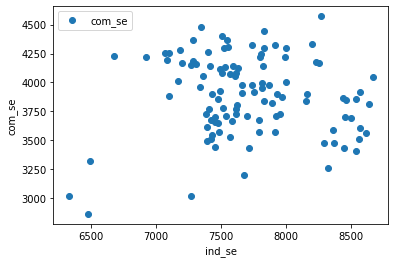

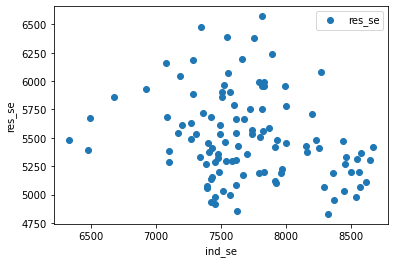

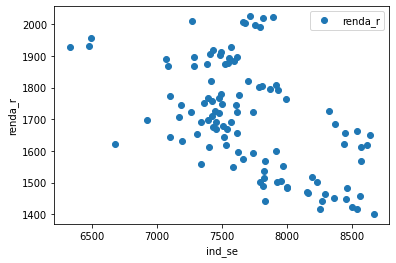

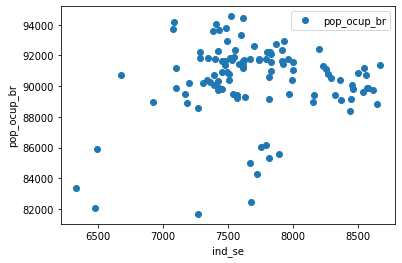

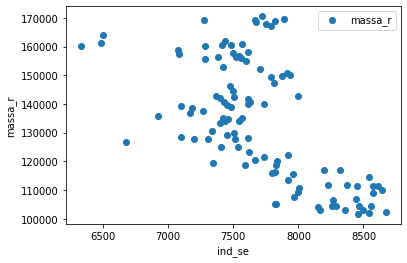

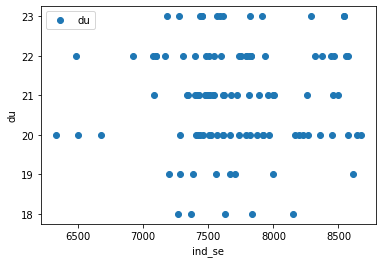

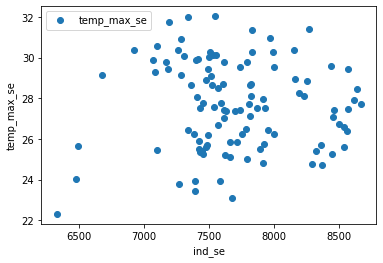

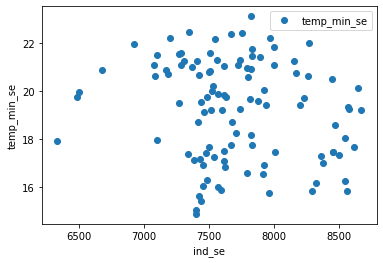

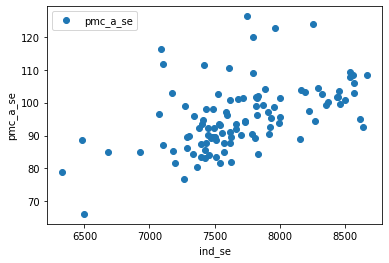

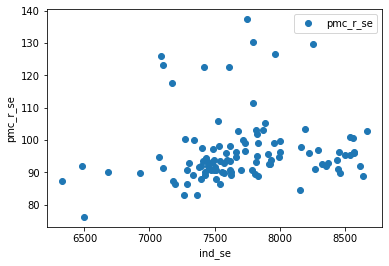

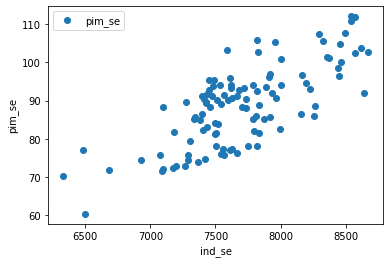

In [71]:
#plotando gráficos de correlação das features (Correlação do consumo industrial com as diversas variáveis)
for i in df_se.columns[0:]:
    if(i != 'ind_se'):
        df_se.plot(x = 'ind_se', y = i, style='o') 
        plt.xlabel('ind_se')  
        plt.ylabel(i) 
        plt.show()

MODELO COM REGRESSÃO LINEAR - (pim_se x ind_se)

In [72]:
df_se.describe()

,com_se,ind_se,res_se,renda_r,pop_ocup_br,massa_r,du,temp_max_se,temp_min_se,pmc_a_se,pmc_r_se,pim_se
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,3888.409596,7706.407342,5503.908962,1701.707824,90395.879675,133754.285166,20.916667,27.662633,19.252320,95.504689,96.434672,88.942679
std,339.004073,481.460656,381.814747,169.822748,2502.579897,20965.413752,1.312236,2.180684,2.081692,10.128352,10.525176,10.701263
min,2861.776330,6331.118910,4828.556000,1400.511600,81666.000000,101690.064900,18.000000,22.314066,14.887778,66.150575,76.130000,60.322438
25%,3672.393945,7425.643797,5201.603050,1568.356175,89512.000000,115231.729775,20.000000,25.831934,17.460833,89.208812,90.639500,81.562121
50%,3901.913500,7620.152085,5443.638000,1694.471000,90805.000000,134382.163150,21.000000,27.636430,19.585556,94.450587,93.577500,89.660952
75%,4158.268750,7960.579000,5727.093090,1821.371050,91791.250000,152435.660850,22.000000,29.472885,21.044518,101.477806,98.393750,94.745178
max,4571.717000,8669.644000,6571.311640,2025.040600,94552.000000,170523.712000,23.000000,32.022581,23.132233,126.255031,137.334905,112.047328


1o. MODELO - REGRESSÃO LINEAR

In [74]:
#APLICANDO REGRESSÃO LINEAR PARA PREVISÃO REGIÃO SE
Xrl = df_se['pim_se'].values
Yrl = df_se['ind_se'].values

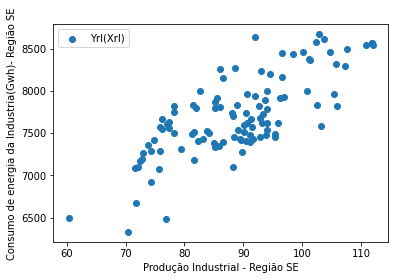

In [75]:
#VISUALIZANDO A DISPERSÃO DOS PONTOS
import matplotlib.pyplot as plt
plt.scatter(Xrl,Yrl,label='Yrl(Xrl)');
plt.xlabel('Produção Industrial - Região SE');
plt.ylabel('Consumo de energia da Industria(Gwh)- Região SE');
plt.legend();

In [76]:
#CARREGANDO A BIBLIOTECA DO MODEO
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

In [77]:
Xrl = Xrl.reshape(-1, 1)

In [79]:
#ALIMENTANDO O MODELO
modelo.fit(Xrl,Yrl)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [80]:
#DEFINICÇÃO DO COEFICIENTE ANGULAR
coef_angular = modelo.coef_[0]
print("Coeficiente angular = {:0.2f}".format(coef_angular))

Coeficiente angular = 34.04


In [81]:
#DEFINICÇÃO DO COEFICIENTE LINEAR
coef_linear = modelo.intercept_
print("Coeficiente linear = {:0.2f}".format(coef_linear))

Coeficiente linear = 4678.62


In [82]:
#CALCULO DA RETA
reta = coef_angular*Xrl+coef_linear

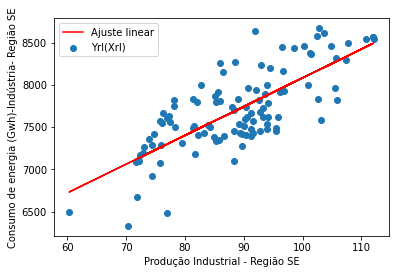

In [83]:
#VIZUALIZAÇÃO DA RETA
plt.scatter(Xrl,Yrl,label='Yrl(Xrl)');
plt.plot(Xrl,reta,label='Ajuste linear',color='red');
plt.xlabel('Produção Industrial - Região SE');
plt.ylabel('Consumo de energia (Gwh)-Indústria- Região SE');
plt.legend();

In [84]:
#ESTIMATIVA DE ACURACIA
acuracia = modelo.score(Xrl, Yrl)
print("Acuracia = {:0.2f}".format(acuracia))

Acuracia = 0.57


In [85]:
#CALCULO DAS METRICAS DE AJUSTE
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE = mean_absolute_error(Yrl,reta)
RMSE = np.sqrt(mean_squared_error(Yrl,reta))

print("MAE = {:0.2f}".format(MAE))
print("RMSE = {:0.2f}".format(RMSE))

MAE = 255.51
RMSE = 313.33


In [86]:
print(RMSE/MAE)

1.2262873849136993


Como a acurácia do modelo é bastante baixa (0,57), ou seja apenas 57% das variações no consumo industrial podem ser explicados por variações da produção industrial diretamente. Verifica-se ainda que erro quadrático médio possui valor de 313,33 sendo portanto 22% maior que o MAE, fica evidenciado a existência de discrepância entre as métricas o que corrobora a tese de que o uso de um modelo com uma unica variável explicativa mostra-se bastante ineficiente.

2o. MODELO - REGRESSÃO LINEAR MULTIPLA

In [87]:
df_se.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 108 entries, 2012-03-01 to 2021-02-01
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   com_se       108 non-null    float64
 1   ind_se       108 non-null    float64
 2   res_se       108 non-null    float64
 3   renda_r      108 non-null    float64
 4   pop_ocup_br  108 non-null    float64
 5   massa_r      108 non-null    float64
 6   du           108 non-null    int64  
 7   temp_max_se  108 non-null    float64
 8   temp_min_se  108 non-null    float64
 9   pmc_a_se     108 non-null    float64
 10  pmc_r_se     108 non-null    float64
 11  pim_se       108 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 11.0 KB


In [88]:
#Importando a biblioteca statsmodels
import statsmodels.api as sm
# Separando os dados transformados em X e y
x_sm = df_se[['com_se', 'res_se', 'renda_r', 'pop_ocup_br', 'massa_r', 'du', 'temp_max_se', 'temp_min_se','pmc_a_se','pmc_r_se', 'pim_se']]
y_sm = df_se['ind_se']
# Adicionando coeficiente as variáveis independentes
x_sm = sm.add_constant(x_sm)
# Treinando o modelo
model_sm = sm.OLS(y_sm, x_sm).fit()
# Visualizando as estatística do modelo treinado
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                 ind_se   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     50.70
Date:                Thu, 24 Jun 2021   Prob (F-statistic):           4.58e-35
Time:                        03:00:02   Log-Likelihood:                -716.25
No. Observations:                 108   AIC:                             1456.
Df Residuals:                      96   BIC:                             1489.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9139.8519   2103.114      4.346      

Percebe-se que o valor do R² ajustado (indicador utilizado para regressão linear múltipla) possui valor de  0,836 indicando que as variáveis independentes explicam 83,6% dos resultados do modelo, o que é um resultado moderadamente bom.


O teste de significância global (F-statistic), sinaliza se ao menos uma das variáveis independentes podem ser utilizadas para explicar o valor de y.
 Seu P-value deve ser menor do 0.05 para a hipótese ser verdadeira, o resultado obtido foi de 4.58e-35 (4,58 x 10^(-33)) ou seja a hipótese é verdadeira.

Por fim, leva-se em consideração o teste de significância (estatística t de cada uma das variáveis independentes), que tem por objetivo indicar se seu valor pode indicar a variabilidade de y. Somente sera considerado verdadeira esta hipotese p/ as variáveis com P-value < 0.05.

Verifica-se que para o modelo em questão apenas as váriáveis Consumo de energia,,dias úteis, Pesquisa mensal do comercio (restria e ampliada) e produção industrial validam a hipótese.

3o. MODELO - DECISION TREE COM UMA VARIÁVEL (A DE MAIOR CORRELÇAO NO MAPA DE CALOR)

In [93]:
#Dividindo o Dataset em teste e treino
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xrl, Yrl, test_size=0.20, random_state=0)  

In [94]:
#Treinando o modelo de Regressão 
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [95]:
#Prevendo os resultados do teste
y_pred=regressor.predict(X_test)
y_pred

array([7630.03932, 7677.07287, 7396.43566, 8359.244  , 7532.54594,
       7426.30427, 7545.07106, 8561.514  , 8498.742  , 7514.24301,
       7702.17941, 8268.487  , 7170.26588, 7507.4632 , 7616.44853,
       7426.30427, 8002.092  , 8256.004  , 7831.95187, 7426.30427,
       7481.01531, 7828.535  ])

In [96]:
#Avaliando o desempenho do Modelo de Arvore de Decisão
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5085333775621901

4o. MODELO - DECISION TREE MULTIPARAMETROS

In [97]:
#Dividindo o Dataset em teste e treino
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.20, random_state=42)


In [98]:
#Treinando o modelo de Regressão 
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [99]:
#Prevendo os resultados do teste
y_pred=regressor.predict(X_test)
y_pred

array([7453.32547, 8000.471  , 8292.903  , 7183.81196, 7496.03492,
       7404.2711 , 7666.69463, 7074.52916, 7086.54822, 8268.487  ,
       7267.81514, 7702.17941, 8000.471  , 7616.44853, 8371.133  ,
       7737.43005, 7630.03932, 7384.03063, 7665.75716, 7404.2711 ,
       8000.471  , 7737.43005])

In [100]:
#Avaliando o desempenho do Modelo de Arvore de Decisão
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6695202508844333

5o. MODELO - GRADIENTE BOOSTING

In [101]:
#GRADIENTE BOOSTING
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)
model.score(X_train, y_train)
model.score(X_test, y_test)

0.7207245728113072